# Project: Loan Data from Prosper

## Preliminary Wrangling

This document explores a dataset containing 113,937 loans, each loan has 81 variables, such as Borrower APR, Lender Yield, Debt, etc.

In [359]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [360]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')

In [361]:
loans.shape

(113937, 81)

In [362]:
loans.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [363]:
loans.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [364]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [365]:
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

### What is the structure of your dataset?

The dataset has 113,937 loans, each loan has 81 features. most of the variables are numeric, some string and few boolean.

### What is/are the main feature(s) of interest in your dataset?


The main feature is Borrower APR (Annual Percentage Rate), also we will look at other varibales that could influence  the Borrower APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Loan Status, Prosper Score, Employment Status,Occupation, Available Bank Card Credit, LoanOriginalAmount and Stated Monthly Income.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: Borrower APR

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
Name: BorrowerAPR, dtype: int64

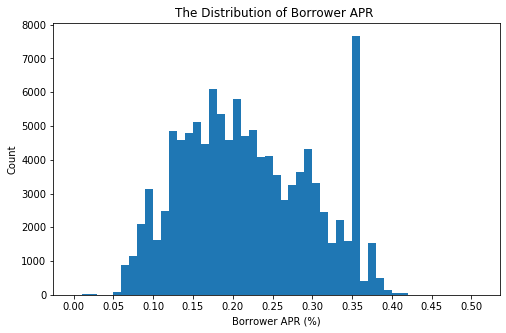

In [366]:
bins = np.arange(0, loans.BorrowerAPR.max(), 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerAPR', bins = bins);
plt.title('The Distribution of Borrower APR ')
plt.xlabel('Borrower APR (%)');
plt.ylabel('Count')
plt.xticks(np.arange(0, loans['BorrowerAPR'].max(), 0.05));
loans.BorrowerAPR.value_counts().head()

From histogram, we can see the most loans are brorrowed at APR of (0.35797) %.

Next, I will look at the distribution of the other variable of interest: Occupations

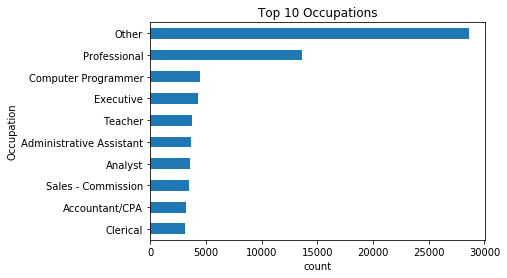

In [367]:
loans['Occupation'].value_counts()[9::-1].plot(kind='barh' )
plt.title('Top 10 Occupations')
plt.xlabel('count')
plt.ylabel('Occupation');

Most loans belong to "other" occupation. Professional occupation is the second in borrowing.

Next, I will look at the distribution of the other variable of interest: Prosper Score

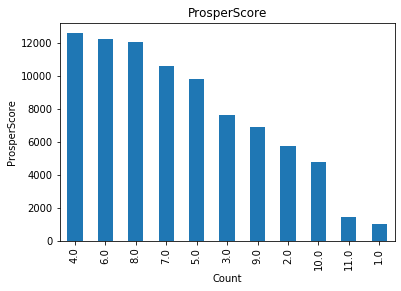

In [368]:
loans['ProsperScore'].value_counts().plot(kind='bar')
plt.title('ProsperScore')
plt.xlabel('Count')
plt.ylabel('ProsperScore')
plt.fontsize = 12
plt.figsize=(12,12)

Prosper score which ranges from 1 to 11, with 11 being the best, or lowest risk, score. The worst, or highest risk, score, is a 1. Most of brrower have Prosper score bewteen 4-8.

Next, I will look at the distribution of the other variable of interest: Loan Status

Text(0, 0.5, 'Loan Status')

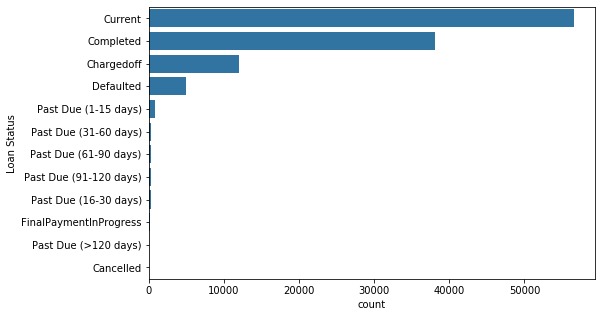

In [369]:
plt.figure(figsize=[8, 5])
base_color=sb.color_palette()[0]
sb.countplot(data = loans, y = 'LoanStatus',color= base_color, order=loans["LoanStatus"].value_counts().index)
plt.ylabel('Loan Status')

The Current status has the highest number of listings loans followed by Completed and Chargedoff.

Next, I will look at the distribution of the other variable of interest: Loan Term

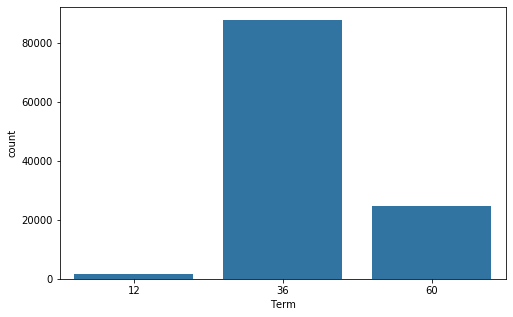

In [370]:
plt.figure(figsize=[8, 5])
base_color=sb.color_palette()[0]
sb.countplot(data = loans, x = 'Term',color= base_color);

Most of borrowers get loans at 36 months.

Next, I will look at the distribution of the other variable of interest: Stated Monthly Income

4166.666667    3526
5000.000000    3389
3333.333333    2917
3750.000000    2428
5416.666667    2374
Name: StatedMonthlyIncome, dtype: int64

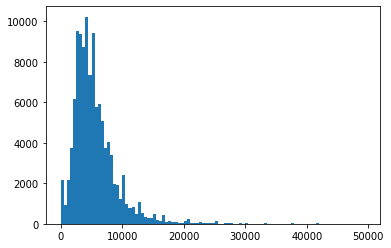

In [371]:
bins = np.arange(0, 50000, 500)
plt.hist(data = loans, x = 'StatedMonthlyIncome', bins=bins);
loans.StatedMonthlyIncome.value_counts().head()

The distribution of stated monthly income is right screwed. Most of stated monthly income between 3000-6000.

Next, I will look at the distribution of the other variable of interest: Available Bank Card Credit

0.0       4881
500.0      303
300.0      151
1000.0     145
2000.0     134
Name: AvailableBankcardCredit, dtype: int64

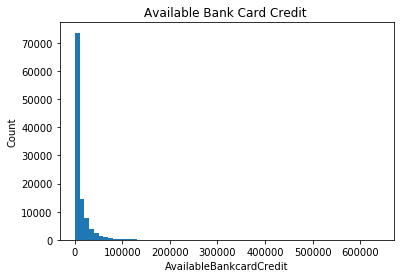

In [372]:
bins = np.arange(0, loans['AvailableBankcardCredit'].max(), 10000)
plt.hist(data = loans, x = 'AvailableBankcardCredit', bins = bins)
plt.title('Available Bank Card Credit ')
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('Count');
loans.AvailableBankcardCredit.value_counts().head()

Available Bank Card Credit is right skewed

Next, I will look at the distribution of the other variable of interest: Prosper Rating (Alpha)

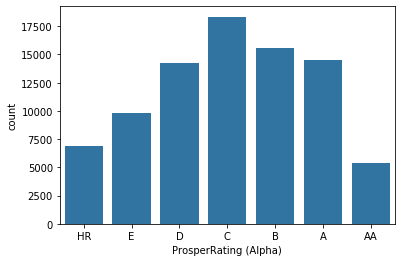

In [395]:
rate_order = ['HR','E','D','C','B','A','AA']
default_color = sb.color_palette()[0]
sb.countplot(data = loans, x = 'ProsperRating (Alpha)', color = default_color, order= rate_order);

Borrowers Rating are displayed in order from lowest to highestrating (HR , E , D , C , B , A , AA ). Most borrowers have rating of C.

Next, I will look at the distribution of the other variable of interest: Employment Status

Text(0, 0.5, 'Employment Status')

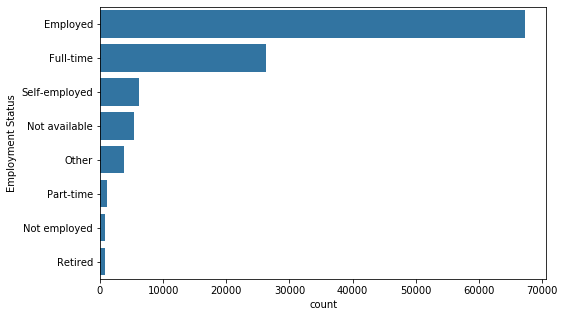

In [382]:
plt.figure(figsize=[8,5])
EmploymentStatus_order=loans["EmploymentStatus"].value_counts().index
base_color=sb.color_palette()[0]
sb.countplot(data = loans, y = 'EmploymentStatus',color=base_color, order=EmploymentStatus_order)
plt.ylabel('Employment Status')

Employed people borrowed the most, least people to borrow loan are not employed and retired. 

Next, I will look at the distribution of the other variable of interest: Loan Original Amount

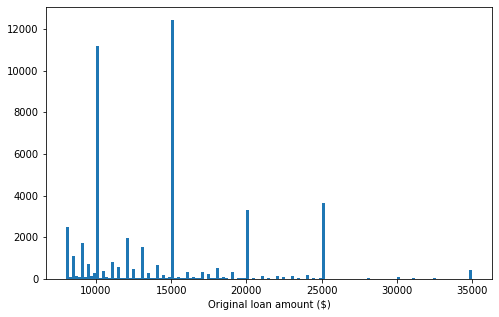

In [383]:
bins = np.arange(8000, loans.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');

It seems most borrowers get loans at 10k and 15k.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The main variable of interest is borrower APR, there are no unusual points and no need to perform any transformations. I explored other variables (LoanStatus, ProsperScore, EmploymentStatus,Occupation,Term, Prosper Rating (Alpha)) for more understanding of Borrower APR.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

AvailableBankcardCredit and StatedMonthlyIncome are right skewed. There is no need to perform any transformations.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

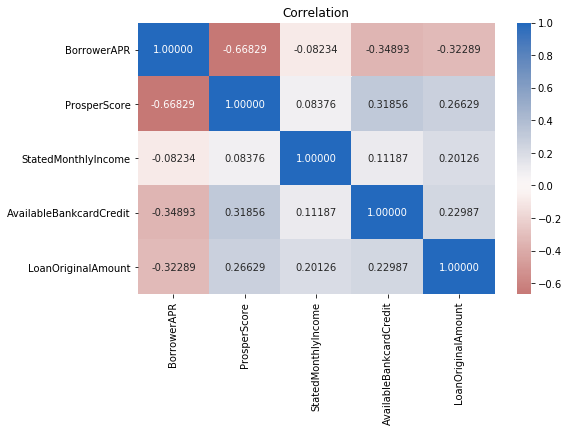

In [384]:
# correlation plot
numeric_vars = ['BorrowerAPR', 'ProsperScore', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit','LoanOriginalAmount']

plt.figure(figsize = [8, 5])
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.5f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation') 
plt.show()

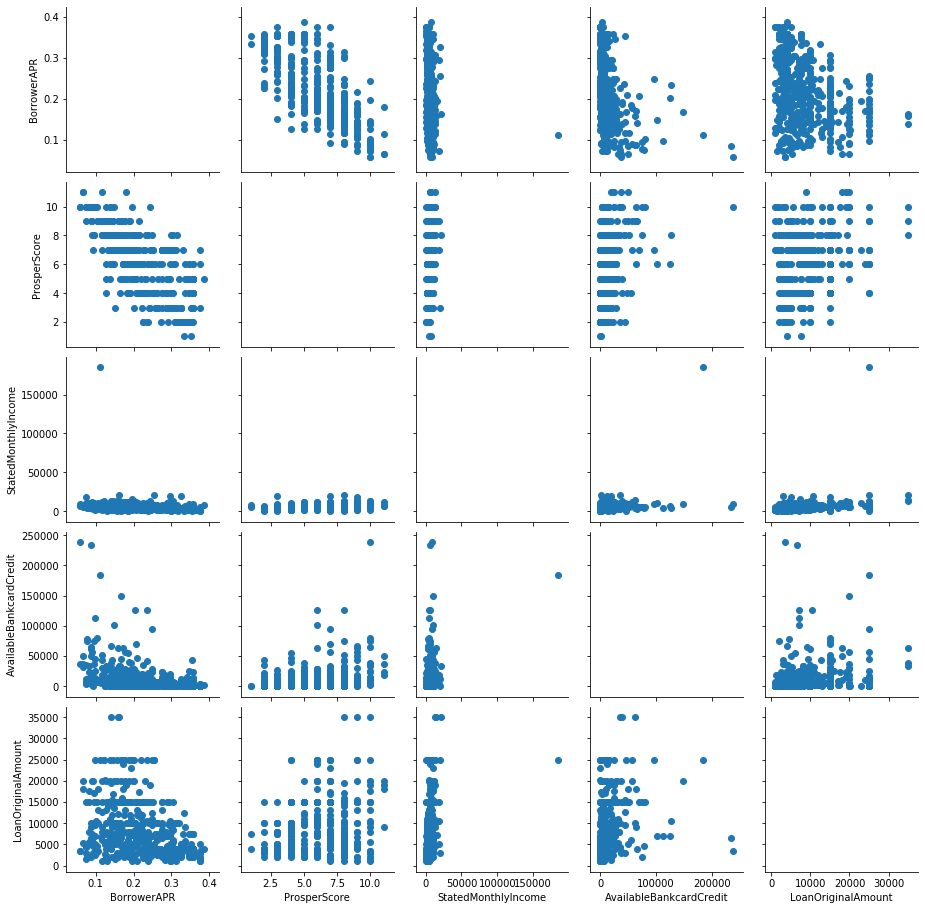

In [385]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
numeric_vars = ['BorrowerAPR', 'ProsperScore', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit','LoanOriginalAmount']
samples = np.random.choice(loans.shape[0], 500, replace = False)
loan_sample = loans.loc[samples,:]

g = sb.PairGrid(data = loan_sample, vars = numeric_vars)
g.map_offdiag(plt.scatter);

There are no strong positive relationships between any variables. APR and ProsperScore have negative correlation  because borrowers with lower score are more likely to pay higher APR.

Let's move on to looking at how borrower APR, StatedMonthlyIncome, AvailableBankcardCredit, ProsperScore and LoanOriginalAmount correlate with the categorical variables.

/Users/SALMAN/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

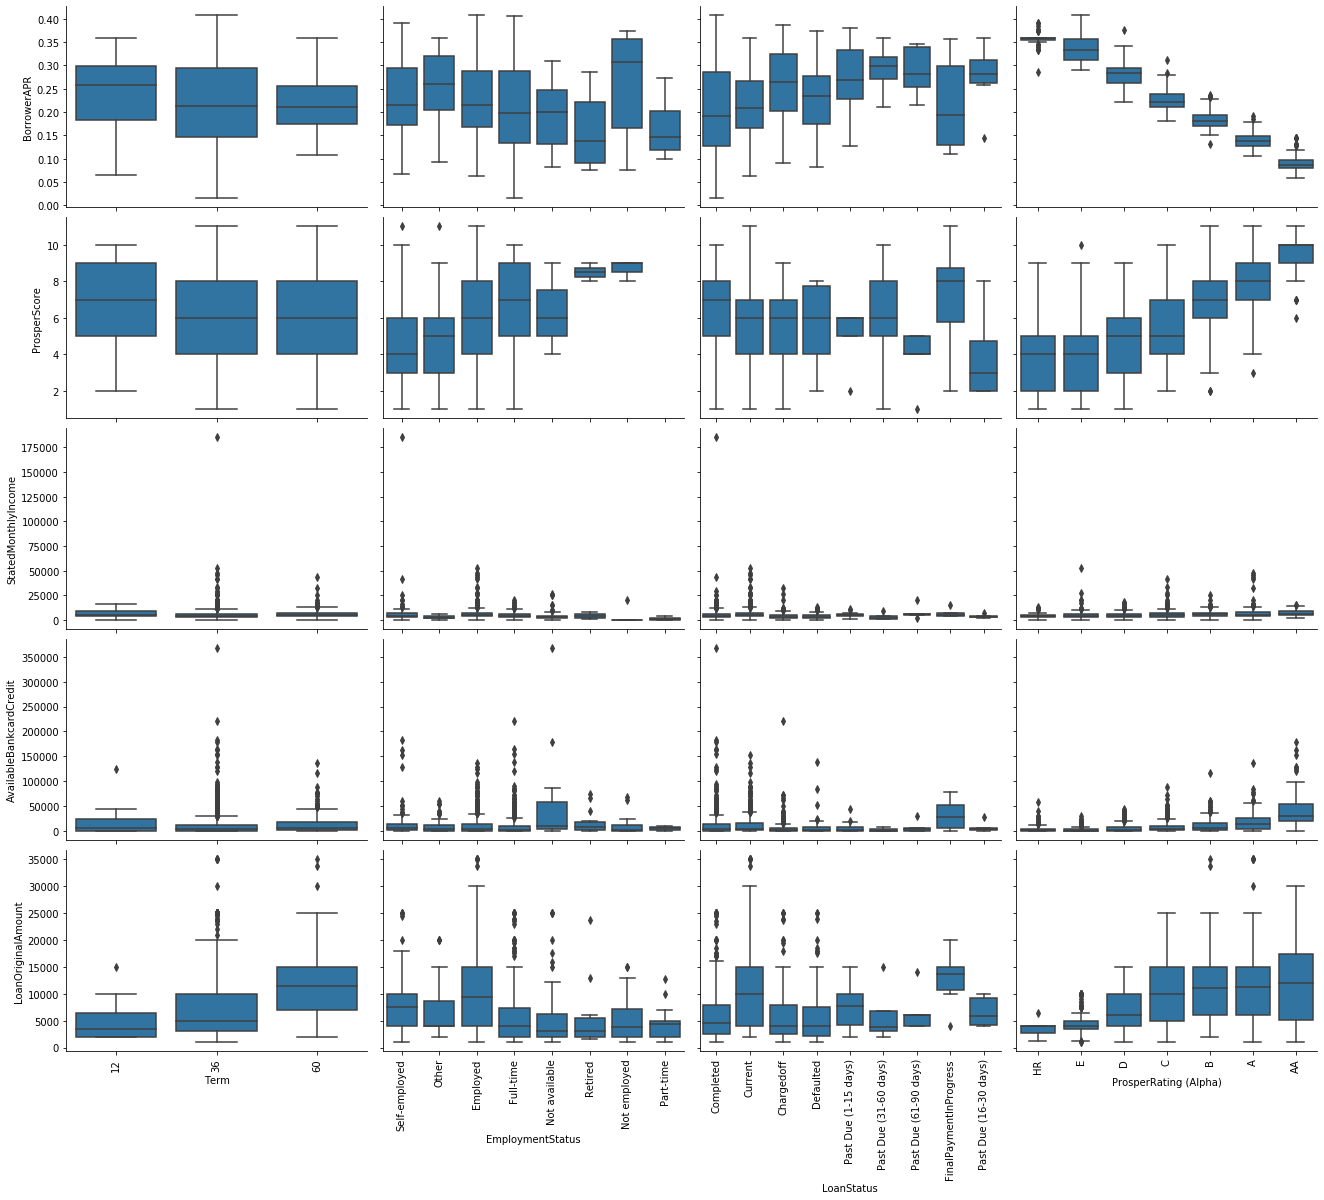

In [396]:
# plot matrix of numeric features against categorical features.
categoric_vars = ['Term','EmploymentStatus','LoanStatus','ProsperRating (Alpha)']

# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=90);

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loans_samp, y_vars = numeric_vars, x_vars = categoric_vars,
             size = 3, aspect = 1.5)
g.map(boxgrid);

There is a strong negative relationship between borrower APR and Prosper Rating, the borrower APR decreases with the better rating. Employed and self-employed have more loans amount, also have more monthly income compare with other employment status.  Term and ProsperRating (Alpha) have strong positive relationship  with LoanOriginalAmount (when term and raiting increase borrower get higher loan amount) 

Finally, let's look at relationships between the three categorical features.

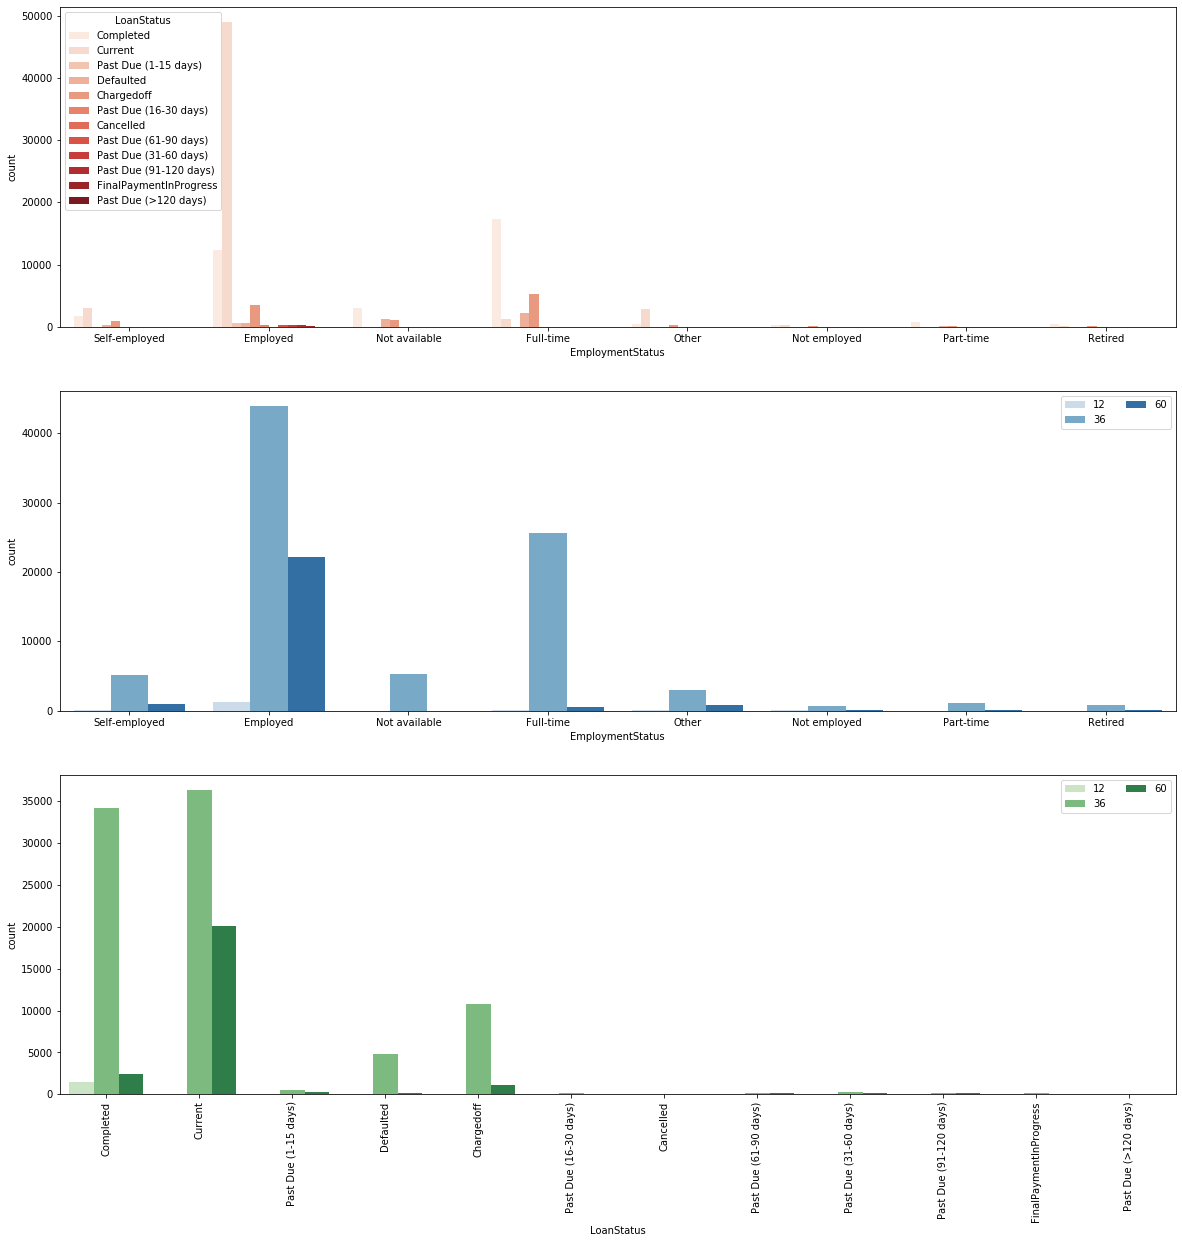

In [387]:
plt.figure(figsize = [20, 20])

# subplot 1: Employment Status vs Loan Status
plt.subplot(3, 1, 1)
sb.countplot(data = loans, x =  'EmploymentStatus', hue = 'LoanStatus', palette = 'Reds')
ax.legend(ncol = 2);# re-arrange legend to remove overlapping

# subplot 2: Employment Status vs Term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loans, x ='EmploymentStatus', hue = 'Term', palette = 'Blues')
ax.legend(ncol = 2);# re-arrange legend to remove overlapping

# subplot 3: Loan Status vs. Term, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loans, x = 'LoanStatus', hue = 'Term', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=90);

subplot 1: most employed borrowers are still have not paid their loans.                                               
subplot 2: most employed, full time and self-employed brrowers borrow loans at 36 months.                             
subplot 3: most of compeleted and current loans are 36 months loans because most borrowers borrow at 36 months.

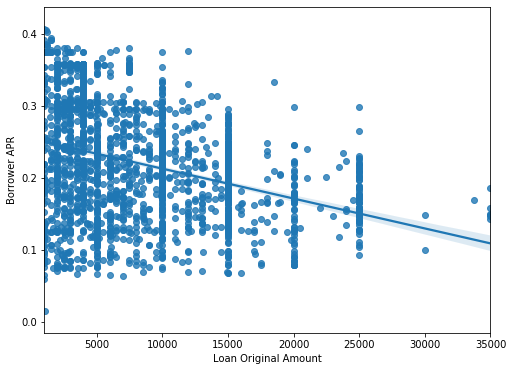

In [388]:
# scatter plot of borrower APR (numeric) vs. LoanOriginalAmount (numeric)
sample=np.random.choice(loans.shape[0],2000, replace=False)
loans_samp=loans.loc[sample]
plt.figure(figsize = [8, 6])
sb.regplot(data = loans_samp, x = 'LoanOriginalAmount', y= 'BorrowerAPR')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.show()

BorrowerAPR and LoanOriginalAmount have negative correlation, when APR decreases the loan amount increases.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


Correlation plot and Matrix Plot can determine which features have negative or positive relationships. BorrowerAPR has  stronger relationship (negative correlated) with ProsperScore and loan original amount, and Prosper Rating. Univariate Exploration helps to examine data points and statistics about our main variable (BorrowerAPR).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Term and ProsperRating (Alpha) have strong positive relationship with LoanOriginalAmount (when term and raiting increase borrower gets higher loan amount)

# Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the categorical variable 'Term' play into the relationship between borrower APR and loan original amount.

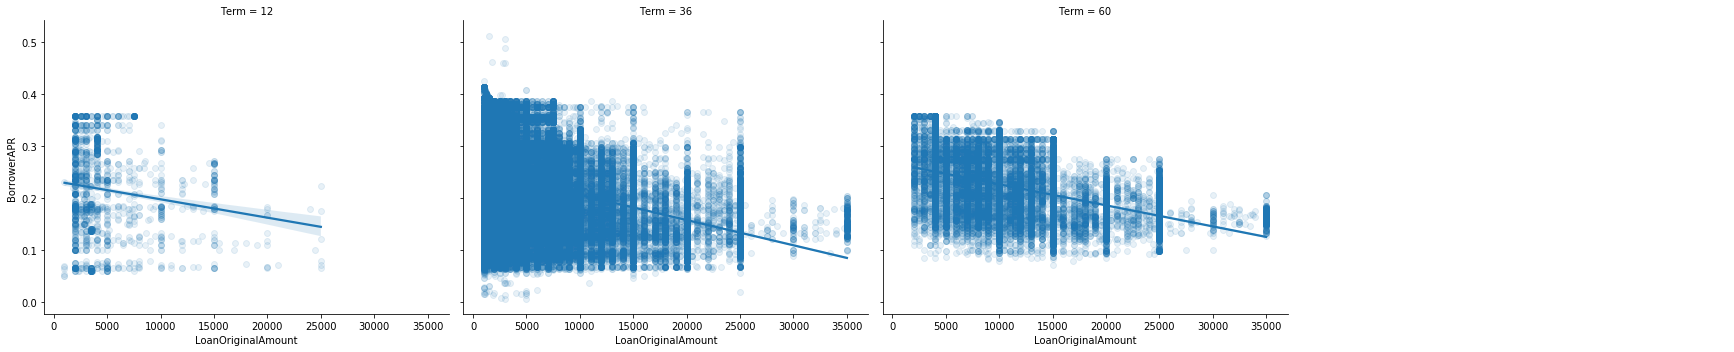

In [390]:
g=sb.FacetGrid(data=loans, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

No influence of Term on the relationship of APR and loan original amount.

Next, I will explore how the categorical variable 'ProsperRating (Alpha)' play into the relationship between borrower APR and loan original amount

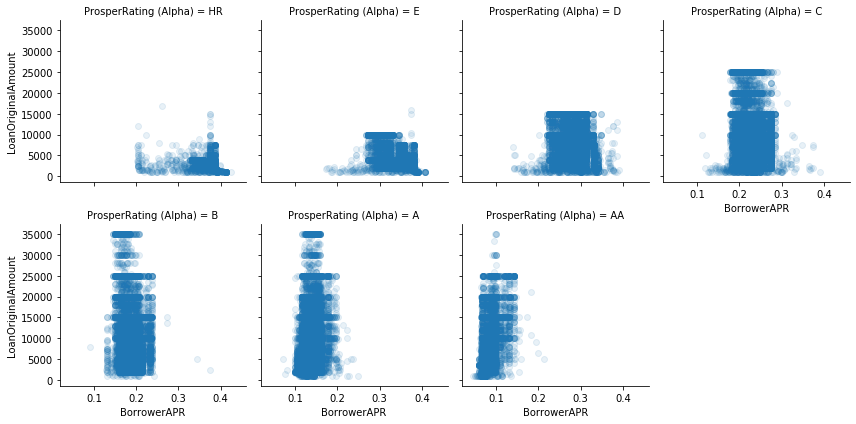

In [394]:
g = sb.FacetGrid(data = loans, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('LoanOriginalAmount')

plt.show()

When borrowers have better rating the APR is lower (negative correlated). When borrower have better rating, they can  borrow more loan amount(positive correlated) with lower APR.

Next, I will explore borrower APR across the categorical variable 'ProsperRating (Alpha)' and 'Term'.

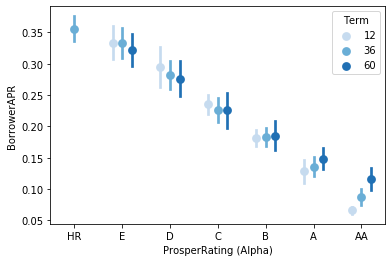

In [400]:
ax = sb.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')

From previous analysis we know when borrowers have higher rating get less APR. When Term increases the APR increases and that happens with AA, A and B rating. However, in C, D, AND E the APR increases when the term is less. HR rating only borrow at 36 months.